# This tutorial intend to show an example of how to extract and compare data from the probe and the cyclops

🚨 Your test logs of the day must be stored in the data folder in the very same format as `test_cyclops.csv` and `test_cyclops.txt`. 

In this notebook we will process as follow :
1. Import the dependencies
2. Select the files we look for depending on the test time
3. Merge and synchronize both files in one
4. Plot the result !

## 1. Import 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

from Data_extract import extract_probe_data, extract_cyclops_data, merge_df
from Data_research import research_files_time

## 2. Exctract the probe logs

In [16]:
# %% Choose the test time you are looking for !
test_time = datetime.time(15, 15)

test = research_files_time(test_time, is_cyclops = False)

# %% Extract data
df_probe = extract_probe_data(test['file_path_probe'], without_time_zero=True)


## 3. Extract the cyclops log and merge both files in one. The time is the key for synchronizing both files

In [17]:
# # %% Extract Cyclops data
# df_cyclops = extract_cyclops_data(test['file_path_cyclops'])

# # %% Merge both files based on their time
# df_merged = merge_df(df_probe, df_cyclops, save_result = True)

## 4. Plot

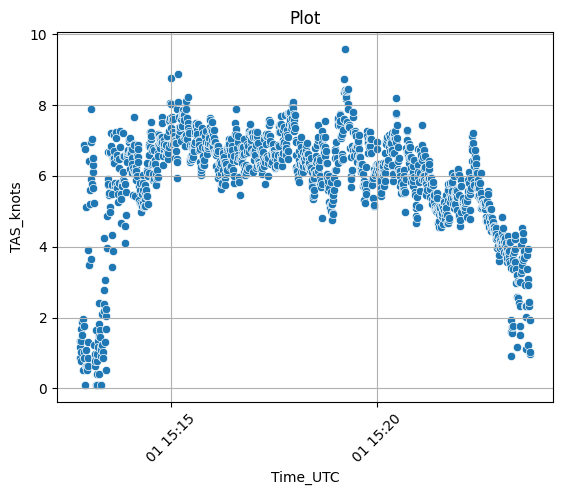

In [18]:
# %% Plot
# sns.scatterplot(x='TAS_knots', y='Cyclops bureau', data=df_merged)
sns.scatterplot(x='Time_UTC', y='TAS_knots', data=df_probe)

# labels and titles
plt.xlabel("Time_UTC")
plt.ylabel("TAS_knots")
plt.title("Plot")
plt.xticks(rotation=45)

# print
plt.grid()
plt.show()